In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!jt -t gruvboxd

In [1]:
dfnumber=1
path = "../Data/Telegram/exportData98{}/corona98{}/telegram_corona98{}_full.csv".format(dfnumber,dfnumber,dfnumber)


In [31]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField,textField_normal,time_jalali,timestamp,views
0,0,"""""","""""","""""",1079529964,"""kisalanalbom""",1079529964_25538,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا. 💉آزمای...","""کرونا اینجا کرونا اونجا کرونا همه جا ازمایش و...",1398-11-11 19:34:07,1580486647,"""49"""
1,1,"""""","""""","""kalasar_news""",1086067252,"""kalasar_news""",1086067252_26025,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا. 💉آزمای...","""کرونا اینجا کرونا اونجا کرونا همه جا ازمایش و...",1398-11-10 23:01:56,1580412716,"""139"""
2,2,"""""","""""","""""",1377161021,"""""",1377161021_4990,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا. 💉آزمای...","""کرونا اینجا کرونا اونجا کرونا همه جا ازمایش و...",1398-11-11 11:42:46,1580458366,"""273"""
3,3,"""""","""""","""""",1157337033,"""""",1157337033_38567,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا 💉آزمایش...","""کرونا اینجا کرونا اونجا کرونا همه جا ازمایش و...",1398-11-11 17:24:53,1580478893,"""31"""
4,4,"""""","""""","""""",1004929434,"""gareshg""",1004929434_17521,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا. 💉آزمای...","""کرونا اینجا کرونا اونجا کرونا همه جا ازمایش و...",1398-11-10 23:22:15,1580413935,"""77"""


In [45]:
df.dtypes

Unnamed: 0           int64
fwd_postId          object
hashtagField        object
mentionField        object
ownerId              int64
ownerName           object
postId              object
tagField            object
textField           object
textField_normal    object
time_jalali         object
timestamp            int64
views               object
dtype: object

In [21]:
pd.to_datetime()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
c = columns[2]
c

'hashtagField'

In [37]:
df[c]=df[c].astype('str')

In [22]:
df.groupby(c).count().sort_values(df.columns[1] , ascending=False)[:10].index.values

array(['""', '"کرونا"', '"ویروس_کرونا"',
       '"مرگبار;تایید;سریعا_اطلاع_رسانی_کنید"', '"فوری"',
       '"چند_خبر_کوتاه"', '"سلامت"', '"عجیب;علائم"', '"♦️"', '"نشر_دهید"'],
      dtype=object)

In [44]:
df[c].dtypes


dtype('O')

In [9]:
c = 'ownerName'
x = df.groupby(columns[5]).count().sort_values(columns[2] ,ascending=False)[c]
y = df.groupby(columns[5]).count().sort_values(columns[2] ,ascending=False)[columns2]


KeyError: 'ownerName'

In [70]:
import datetime
#1398-11-11 19:34:07
def parse_time(t):
    d , t = t.split()
    y,m,d = list(map(int,d.split('-')))
    h,mi,se = list(map(int,t.split(':')))
    return datetime.datetime(y,m,d,h,mi,se)

df['time_jalali'].apply(lambda t : parse_time(t))

datetime.datetime(1398, 11, 12, 0, 0)

In [75]:
df = type_conversion(df)

In [79]:
len(df[c].unique())

9921

In [74]:
def type_conversion(df):
    for c in df.columns:
        if(df[c].dtypes == np.object):
            df[c] = df[c].astype('str')
        if(c == 'time_jalali'):
            df[c] = df[c].apply(lambda t : parse_time(t))
    
    return df

In [108]:
def common_report(df , name):
    print("df name is {}".format(name))
    print("df columns are : ")
    df = type_conversion(df)
    print(df.dtypes)
    print(df.describe())
    columns = df.columns
    for i,c in enumerate(columns):
        print("----------column {}----------------".format(c))
        dfg = df.groupby(c).count().sort_values(df.columns[(i+1)%len(columns)] , ascending=False)
        print("top frequent values \n {}".format(dfg[:10].index.values))
        print("range of values are from {} to {}".format(min(df[c]) , max(df[c])))
        print("Number of unique values {}".format(len(df[c].unique())))
        print("Some statistics of column {}".format(c))
        print(dfg[columns[(i+1)%len(columns)]].describe())
        

In [109]:
common_report(df,"telegram_corona98{}".format(dfnumber))

df name is telegram_corona981
df columns are : 
Unnamed: 0           int64
fwd_postId          object
hashtagField        object
mentionField        object
ownerId              int64
ownerName           object
postId              object
tagField            object
textField           object
textField_normal    object
time_jalali         object
timestamp            int64
views               object
dtype: object
          Unnamed: 0       ownerId     timestamp
count  224069.000000  2.240690e+05  2.240690e+05
mean   112034.000000  1.158392e+09  1.580212e+09
std     64683.293071  1.647816e+08  2.300973e+05
min         0.000000  7.943580e+05  1.579552e+09
25%     56017.000000  1.060153e+09  1.580008e+09
50%    112034.000000  1.122761e+09  1.580285e+09
75%    168051.000000  1.270162e+09  1.580415e+09
max    224068.000000  1.499953e+09  1.580503e+09
----------column Unnamed: 0----------------
top frequent values 
 [     0 149384 149373 149374 149375 149376 149377 149378 149379 149380]
range of

Number of unique values 178382
Some statistics of column textField
count    178382.000000
mean          1.256119
std           3.349094
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         553.000000
Name: textField_normal, dtype: float64
----------column textField_normal----------------
top frequent values 
 ['"فوری فوری سریعا اطلاع رسانی کنید ویروس مرگبار کرونا به ایران رسید جزییات نام شهرهایی که ویروس دیده شده https t me joinchat aevqnbihwpk 636 cjgq مسیولان کشور رسما تایید کردند"'
 '"کرونا ویروس در کمین ایرانیان اطلاعیه و هشدار فوری سازمان بهداشت جهانی درباره ویروس مهلک و اسرار امیز کرونا که باید تمام جمعیت ایران ان را ببینند و به توصیه هایش عمل کنند این ویروس مرموز و ناشناخته می تواند در سال 65 میلیون نفر چیزی نزدیک به جمعیت کنونی ایران را به کشتن دهد با توجه به اینکه در این مدت 30 هزار ایرانی به چین رفت و امد داشتند و تولید واکسن اولیه کرونا ویروس در بهترین حالت 3 الی 6 ماه زمان می برد بهترین راه حل برای در امان ماندن از دست این 

In [106]:
dfg[columns[1]].describe()

count    42237.000000
mean         5.305041
std         12.435293
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        471.000000
Name: fwd_postId, dtype: float64

In [103]:
df[c]

0         1079529964
1         1086067252
2         1377161021
3         1157337033
4         1004929434
5         1086049140
6         1304810997
7         1301660420
8         1435425124
9         1089423114
10        1314455155
11        1468702924
12        1290766220
13        1101486971
14        1068986196
15        1113885790
16        1009954401
17        1009228495
18        1139653862
19        1322254254
20        1310518935
21        1068321269
22        1019527649
23        1140747771
24        1424347456
25        1393893605
26        1009797038
27        1080495378
28        1112868734
29        1074690364
             ...    
224039    1245769196
224040    1047214751
224041    1062046736
224042    1394541072
224043    1412225806
224044    1051196460
224045    1078004378
224046    1110108681
224047    1245716119
224048    1412466084
224049    1012687880
224050    1403212947
224051    1090513194
224052    1009272308
224053    1110108681
224054    1360664938
224055    136

(array([7.6900e+02, 8.6100e+02, 3.2400e+02, 1.0200e+02, 1.0100e+02,
        7.5000e+01, 4.5142e+04, 9.9757e+04, 4.5311e+04, 3.1627e+04]),
 array([7.94358000e+05, 1.50710226e+08, 3.00626093e+08, 4.50541961e+08,
        6.00457828e+08, 7.50373696e+08, 9.00289564e+08, 1.05020543e+09,
        1.20012130e+09, 1.35003717e+09, 1.49995303e+09]),
 <a list of 10 Patch objects>)

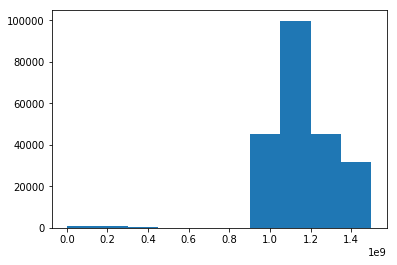

In [102]:
c = "ownerId"
dfg = df.groupby(c).count().sort_values(df.columns[(1)%len(columns)] , ascending=False)
dfg[columns[1]]
plt.hist(df[c] )

In [16]:
max(df['time_jalali'])

'1399-02-02 00:00:00'

In [17]:
columns

Index(['Unnamed: 0', 'fwd_postId', 'hashtagField', 'mentionField', 'ownerId',
       'ownerName', 'postId', 'tagField', 'textField', 'textField_normal',
       'time_jalali', 'timestamp', 'views'],
      dtype='object')

In [19]:
c=1
df.groupby(columns[1]).count()

,Unnamed: 0,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField,textField_normal,time_jalali,timestamp,views
fwd_postId,,,,,,,,,,,,
"""""",1084729,1084729,1084729,1084729,1084729,1084729,1084729,1084729,1084729,1084729,1084729,1084729
"""1000006005_20513""",1,1,1,1,1,1,1,1,1,1,1,1
"""1000006831_26489""",1,1,1,1,1,1,1,1,1,1,1,1
"""1000006831_26826""",1,1,1,1,1,1,1,1,1,1,1,1
"""1000006831_26851""",1,1,1,1,1,1,1,1,1,1,1,1
"""1000006831_26857""",1,1,1,1,1,1,1,1,1,1,1,1
"""1000006831_26867""",1,1,1,1,1,1,1,1,1,1,1,1
"""1000006831_26919""",1,1,1,1,1,1,1,1,1,1,1,1
"""1000008819_13490""",1,1,1,1,1,1,1,1,1,1,1,1


In [22]:
c=2
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,mentionField,ownerId,ownerName,postId,tagField,textField,textField_normal,time_jalali,timestamp,views
hashtagField,,,,,,,,,,,,
"""!!;کفو_یاکویت;کرونا""",1,1,1,1,1,1,1,1,1,1,1,1
"""!""",1,1,1,1,1,1,1,1,1,1,1,1
"""!;والله;کرونا;کویت""",1,1,1,1,1,1,1,1,1,1,1,1
"""""",826861,826861,826861,826861,826861,826861,826861,826861,826861,826861,826861,826861
"""&""",3,3,3,3,3,3,3,3,3,3,3,3
"""&;8220;مستعان&""",1,1,1,1,1,1,1,1,1,1,1,1
"""&;that&;news&""",1,1,1,1,1,1,1,1,1,1,1,1
"""&;لیگ&""",1,1,1,1,1,1,1,1,1,1,1,1
"""(""",70,70,70,70,70,70,70,70,70,70,70,70


In [23]:
c=3
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,ownerId,ownerName,postId,tagField,textField,textField_normal,time_jalali,timestamp,views
mentionField,,,,,,,,,,,,
"""!""",10,10,10,10,10,10,10,10,10,10,10,10
"""""",383907,383907,383907,383907,383907,383907,383907,383907,383907,383907,383907,383907
"""$;ن""",1,1,1,1,1,1,1,1,1,1,1,1
"""$وَلَدْ""",1,1,1,1,1,1,1,1,1,1,1,1
"""(""",50,50,50,50,50,50,50,50,50,50,50,50
"""(;ayehhamdavi""",1,1,1,1,1,1,1,1,1,1,1,1
"""(;bardegi57""",3,3,3,3,3,3,3,3,3,3,3,3
"""(;bbcpersion1""",1,1,1,1,1,1,1,1,1,1,1,1
"""(;d2420""",2,2,2,2,2,2,2,2,2,2,2,2


In [24]:
c=4
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerName,postId,tagField,textField,textField_normal,time_jalali,timestamp,views
ownerId,,,,,,,,,,,,
8802927,1,1,1,1,1,1,1,1,1,1,1,1
9538059,1,1,1,1,1,1,1,1,1,1,1,1
13603097,1,1,1,1,1,1,1,1,1,1,1,1
16372618,1,1,1,1,1,1,1,1,1,1,1,1
18944982,6,6,6,6,6,6,6,6,6,6,6,6
19052319,1,1,1,1,1,1,1,1,1,1,1,1
19580929,1,1,1,1,1,1,1,1,1,1,1,1
19673087,1,1,1,1,1,1,1,1,1,1,1,1
21898640,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
c=5
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,postId,tagField,textField,textField_normal,time_jalali,timestamp,views
ownerName,,,,,,,,,,,,
"""""",1020510,1020510,1020510,1020510,1020510,1020510,1020510,1020510,1020510,1020510,1020510,1020510
"""a11122""",2,2,2,2,2,2,2,2,2,2,2,2
"""a13011301""",1,1,1,1,1,1,1,1,1,1,1,1
"""a13651389a""",1,1,1,1,1,1,1,1,1,1,1,1
"""a246890""",1,1,1,1,1,1,1,1,1,1,1,1
"""a3maneh""",1,1,1,1,1,1,1,1,1,1,1,1
"""a55sh""",1,1,1,1,1,1,1,1,1,1,1,1
"""a56310011""",1,1,1,1,1,1,1,1,1,1,1,1
"""a64315""",6,6,6,6,6,6,6,6,6,6,6,6


In [26]:
c=6
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,tagField,textField,textField_normal,time_jalali,timestamp,views
postId,,,,,,,,,,,,
1000000171_348,1,1,1,1,1,1,1,1,1,1,1,1
1000001713_109416,1,1,1,1,1,1,1,1,1,1,1,1
1000003407_3753,1,1,1,1,1,1,1,1,1,1,1,1
1000003667_1242,1,1,1,1,1,1,1,1,1,1,1,1
1000003667_1244,1,1,1,1,1,1,1,1,1,1,1,1
1000003667_1245,1,1,1,1,1,1,1,1,1,1,1,1
1000003667_1248,1,1,1,1,1,1,1,1,1,1,1,1
1000005497_17658,1,1,1,1,1,1,1,1,1,1,1,1
1000005855_1348,1,1,1,1,1,1,1,1,1,1,1,1


In [27]:
c=7
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,textField,textField_normal,time_jalali,timestamp,views
tagField,,,,,,,,,,,,
"""""",55761,55761,55761,55761,55761,55761,55761,55761,55761,55761,55761,55761
"""A13 بایونیک;حسگر اثرانگشت;دولت ژاپن;اختصاص اعتبار;میلیارد دلاری;خروج از چین;محققان MIT;سرایت بیماری;ماه نخست;نخست امسال;اتباع ایرانی;خریدار مسکن;مسکن ترکیه;مسکن در ترکیه;دیجی کالا;رفع مشکلات;سهم شرکت;سرمایه گذاری;تامین اجتماعی;سقف قیمتی;بازار سرمایه;بازار سهام;سازمان فناوری;فناوری اطلاعات;تاثیر کرونا;سازمان فناوری اطلاعات;اطلاعات و ارتباطات;انتخابات امریکا;شکست ترامپ;سالی بزرگ;ترکیب فناوری;فناوری پیشرفته;مانع اصلی;تجزیه و تحلیل;ویژگی متمایز;امنیت سایبری;داده ها;اماده سازی;نیروی کار;ظرفیت تولید;نیروهای انسانی;امکانات جدید;مشکلات کار;بهره وری;تحقیقات بازار""",3,3,3,3,3,3,3,3,3,3,3,3
"""BBC فارسی;ابتلا به کرونا;اطلاعات ژنتیک;بانک اطلاعات;اطلاعات پزشکی;شدت بیماری;ویروس کرونا;ای ان;مبتلایان به ویروس""",1,1,1,1,1,1,1,1,1,1,1,1
"""BBC فارسی;اتحادیه اروپا;بهبود اقتصادی;میلیارد یورو;نجات اقتصادی;عبور از رکود;موسسات اروپایی;اقتصاد اتحادیه اروپا""",1,1,1,1,1,1,1,1,1,1,1,1
"""BBC فارسی;احتمال بازگشایی;اماکن مذهبی;زیر فشار;اماکن زیارتی;شرایط لازم;گسترش ویروس;ویروس کرونا;گسترش ویروس کرونا""",1,1,1,1,1,1,1,1,1,1,1,1
"""BBC فارسی;ارایشگاه ها;شیوع کرونا;مدارس ابتدایی""",1,1,1,1,1,1,1,1,1,1,1,1
"""BBC فارسی;ارسال دستگاه;دستگاه تنفس;تنفس مصنوعی;دستگاه تنفس مصنوعی;دونالد ترامپ;امادگی امریکا;ویروس کرونا;ایالات متحده;جو بایدن;انتخابات ریاست;پیروزی جو بایدن;جمهوری ایالات متحده;جواد ظریف;امور داخلی""",1,1,1,1,1,1,1,1,1,1,1,1
"""BBC فارسی;استفاده از ماسک;درباره ویروس;ویروس کرونا;درباره ویروس کرونا""",1,1,1,1,1,1,1,1,1,1,1,1
"""BBC فارسی;استفاده مشترک;کمبود تجهیزات""",2,2,2,2,2,2,2,2,2,2,2,2


In [28]:
c=8
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField_normal,time_jalali,timestamp,views
textField,,,,,,,,,,,,
"""! این تصویری که می‌بینید، جنازه زنی مصری هست. بعد از مبتلا شدن به ویروس کرونا، در بیمارستان بستری و مورد معالجه و مداوا قرار گرفت، سپس بعد از گذشت چندین روز کرونا را شکست داد و سلامتی خود را دست آورد، با هزار آرزو و خوشحالی به همراه پرستاران با آمبولانس به خانه برگشت، با صحنه‌ی عجیبی که تصورش را نمی‌کرد روبرو شد. فرزندانش به خانه راهش ندادند و گفتند: ما و فرزندانمان به ویروس مبتلا می‌شویم، هرجا می‌خواهی برو ولی نمی‌توانی به خانه بیایی، در همان لحظه ایست قلبی کرد و بعد از چند روز بستری در بیمارستان فوت کرد. و تنها پزشکان و پرستاران بیمارستان بر او نماز خواندند و دفنش کردند. کرونای واقعی فرزندانی هستند که یک عمر با خون جگر برای آنان زحمت بکشی و بزرگشان کنی ولی آنان سبب مرگت شوند، کرونا مبارک این زندگی باد @Ghalbeshisheyiii""",1,1,1,1,1,1,1,1,1,1,1,1
"""! هیچ جا ملت بیخیالی مثل سوئد پیدا نمی کنید انگار نه انگار تو این کشور ۱۰هزار مبتلا به کرونا هست و بیش از ۹۰۰نفر هم تلفات کرونایی دارن! رستوران‌ها ، پارک‌ها همه‌جا بدون محدودیت بازه و بی‌بی‌سی و منوتو و اینترنشنال و... هم ندارن که صدتا حاشیه برای کشورشون درست کنند . انجمن حرفه اَي واحدهاي تفريحي پذيرايي و سفره خانه هاي سنتي استان البرز @jvpalborz""",2,2,2,2,2,2,2,2,2,2,2,2
"""!! وزارت کار !! 🔹هیچ سایتی برای ثبت نام تسهیلات ۱۰ میلیون ریالی کرونا وجود ندارد 🔹شهروندان باید مراقب کلاهبرداری اینترنتی در این زمینه باشند. #ارشاد_رایانه_جوین 💠 @ershadrayaneh""",1,1,1,1,1,1,1,1,1,1,1,1
"""!! وزارت کار !! 🔹هیچ سایتی برای ثبت نام تسهیلات ۱۰ میلیون ریالی کرونا وجود ندارد 🔹شهروندان باید مراقب کلاهبرداری اینترنتی در این زمینه باشند. @operaes""",1,1,1,1,1,1,1,1,1,1,1,1
"""!! وزارت کار !! 🔹هیچ سایتی برای ثبت نام تسهیلات ۱۰ میلیون ریالی کرونا وجود ندارد 🔹شهروندان باید مراقب کلاهبرداری اینترنتی در این زمینه باشند. به کانال بجستان فردا بپیوندید👇 🆔@bajestanfarda""",1,1,1,1,1,1,1,1,1,1,1,1
"""!! وزارت کار !! 🔹هیچ سایتی برای ثبت نام تسهیلات ۱۰ میلیون ریالی کرونا وجود ندارد 🔹شهروندان باید مراقب کلاهبرداری اینترنتی در این زمینه باشند.""",1,1,1,1,1,1,1,1,1,1,1,1
"""!!! چرا فقط از مردم انتظار دارید اجاره بها نگیرند؟ چرا مردم باید رئوف و بخشنده باشند؟ شماها که خود را مظهر رأفت انسانی و اسلامی می دانید چرا در این تنگنا کنار مردم نیستید؟ چرا سیل قبوض آب، برق، گاز و تلفن همراه را روانه خانه های مردم کردید؟ چرا بعد از چهل سال حتی حاضر نشدید یک ماه شعار آب و برق مفتی را جامه عمل بپوشانید؟ تو این شرایط پیامک فرستاده اید که شماره کنتور خود را برای ما ارسال کنید. به خدا که سنگ پا از خجالت سر به زیر افکنده است. به خدا خرخره این مردم دیگر نای جویده شدن ندارد. بعد می گویید چرا مردم در خانه نمی مانند، خب شما اندکی از فشار بر این خرخره را کم تا قشر زیر فقر بتواند نفس بکشد آنگاه در خانه هم می ماند. دست پینه بسته پدر کارگر، چشم اشکبار مادر کارگر فقط یک چیز می فهمد شکم فرزندش نباید گرسنه بماند. *او کرونا نمی شناسد، نان می خواهد...* شما هم اندکی کوتاه بیایید و بجای عقب انداختن قسط ها آنها را ببخشید * محافظه کاریروبزاریدکنارآزاده باشید.💥💫💥❣..""",1,1,1,1,1,1,1,1,1,1,1,1
"""!قابل توجه پدران و مادران😱🙊 یکی از علائم تشدید کرونا در کودکان😒😔 لطفاً جدی بگیرید""",1,1,1,1,1,1,1,1,1,1,1,1
"""# #در خانه -بمانیم -کرونا_را_شکست_میدهیم 💪💪 ◾️#تصاویر ،فیلم ، بیشتر در کانال بزرگ ◾️#طبیعت بکر و فرهنگ هورامان https://t.me/tabiaatawraman""",1,1,1,1,1,1,1,1,1,1,1,1


In [29]:
c=9
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField,time_jalali,timestamp,views
textField_normal,,,,,,,,,,,,
"""0 0 تفکر در ایات قران کرونا گفتمش این ویروس تا کی در کشور ما می ماند گفت چند روزی بیش نیست بقره ایه 184 گفتمش خدا روشکر که میزان ابتلا به این بیماری بسیار زیاد نیست و از بین مبتلایان میزان مرگ و میر اندک است گفت اکنون خدا به شما تخفیف داد چرا که می دانست که در شما ضعف وسستی هست انفال ایه 66 گفتمش مسیولین بهداشتی کشور برای مقابله با این بیماری فراگیر توصیه هاو دستورات ویژه ای دارند گفت و هیچ کس مانند اگاه تو را خبردار نمی کند فاطر ایه 14 گفتم در برابر سخنان و توصیه های بهداشتی پزشکان چه کنیم گفت بشنوید و اطاعت نمایید تغابن ایه 16 گفتمش برای در امان ماندن از اسیب کرونا چه باید کنیم گفت و در خانه هایتان بمانید و ارام گیرید احزاب ایه 33 خانه های امن و ایمن حجر ایه 82 گفتم گویا راه پیشگیری از این بیماری رعایت بهداشت است برای رعایت بهداشت فردی چه کنیم گفت صورت و دست هایتان را بشویید مایده ایه 6 گفتم لباسهایمان هم می تواند ناقل بیماری باشد ان را چه کنیم گفت و جامه ات را پاک و تمیز کن مدثر ایه 4 گفتمش ایا بیرون امدن بی مورد از منزل را جایز می دانی گفت خود را با دستان خود به هلاکت نیندازید بقره ایه 195 گفتمش اگر کسی را دیدیم که تب و لرز و مشکل تنفسی دارد نشانه چیست گفت او بیمار است صافات 145 گفتم در این صورت ما چه کنیم گفت به او نزدیک نشوید بقره ایه 187 گفتم مگر این ویروس چگونه از افراد بیمار به ما منتقل می شود گفت از دهانشان بیرون می اید کهف ایه 5 گفتمش ایا در این ایام می توانیم به خانه ی دوستان و خویشان سری بزنیم و وارد شویم گفت به خانه هایی غیر از خانه های خودتان وارد نشوید نور ایه 27 گفتم ایا در ایام قرنطینه می توانیم با خانواده برای خرید از خانه خارج شویم گفت پس یکی از خودتان را با این پولتان به شهر روانه کنید و او باید با تامل بنگرد کدام یک از مغازه داران شهر غذایش پاکیزه تر است پس غذایی از ان برایتان بیاورد کهف ایه 19 گفتمش چرا برخی از افراد توصیه های بهداشتی را رعایت نمی کنند گفت چون انان گروهی هستند که نمی فهمند حشر ایه 13 گفتم ما چه کنیم گفت او را مس و لمس نکنید اعراف ایه 73 با انان ننشینید نسا ایه 140 گفتم ایا در رعایت قرنطینه و نکات بهداشتی مشکل این روزهای ما حل می شود گفت در ان درمانی برای مردم است نحل ایه 69 گفتمش این خانه نشینی و قرنطینه کسب و کار برخی از ماها را تحت تاثیر قرار داده و برایمان مشکلات اقتصادی شدیدی ایجاد نموده گفت و اگر از فقر و تنگدستی میترسید خداوند شما را از فضل و احسانش بی نیاز می کند توبه ایه 28 گفتمش گروهی در این موقعیت با پخش خبرهای دروغ در فضای حقیقی و مجازی موجب نشر اکاذیب و ترویج روحیه ترس در مردم می شوند اینان کیانند گفت منافقان و انان که در دل هایشان بیماریست و انانکه در شهر شایعه های دروغ و دلهره اور پخش می کنند احزاب ایه 60 گفتم برخی می گویند ساخت و اشاعه ی این ویروس در جهان کار جهان خواران و دشمنان قسم خورده ی ماست تا با این کید و حیله به ما ضربه بزنند گفت و اگر شکیبایی ورزید و پرهیزکاری کنید نیرنگشان هیچ زیانی به شما نمی رساند مسلما خدا به انچه انجام می دهند احاطه دارد ال عمران ایه 120 گفتمش سرانجام چه کسی ما را از این سختی و رنج رهایی می بخشد گفت خدا شما را از این سختی و از هر اندوهی نجات می دهد انعام ایه 64 محفل شهدایی شهیدابراهیم نجاتی""",1,1,1,1,1,1,1,1,1,1,1,1
"""0 1 ده درس از بحران همه گیری جهانی ویروس کرونا دوران محنت و دشواری علاوه بر زمان صبر و تحمل و کمک به دیگران دوران درس اموزی از روال ها و فرایندها و سیاست های گذشته نیز هست همه گیری کرونا و خسارات عظیم انسانی و مادی ان اکثر افراد را به تجدید نظر در سیاست ها و باورهایشان وادار خواهد کرد در این نوشته به ده درس کوتاه از این دوران برای ان تجدید نظر اشاره می کنم درس اول کمونیسم و اسلامگرایی نه تنها خطرناک بلکه مرگبارند دولت های کمونیستی و اسلامگرا نه تنها عامل فقر و نکبت سرکوب ازادی ها و نافی کرامت انسان ها بلکه تهدید کننده ی بهداشت انسان هایند و جان افراد را حتی بدون مخالفت با انها می گیرند رفتار دو دولت کمونیستی چین و دولت اسلامی در ایران در پنهانکاری در مورد این ویروس و عدم اطلاع رسانی از مخاطرات ان و عدم همکاری با دیگر کشورها در به اشتراک گذاشتن ویروس و یافتن دارو باعث کشتار ده ها هزار نفر در سراسر عالم و خسارات چند ده تریلیون دلاری به اقتصاد جهانی شده است فراموش نکنیم که ایرانیان بدون انکه بدانند حامل این ویروس به حداقل بیست کشور دیگر بودند از همسایگان تا امریکای شمالی از اسیای

In [30]:
c=10
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField,textField_normal,timestamp,views
time_jalali,,,,,,,,,,,,
1399-01-23 00:00:00,1,1,1,1,1,1,1,1,1,1,1,1
1399-01-23 00:00:01,3,3,3,3,3,3,3,3,3,3,3,3
1399-01-23 00:00:02,2,2,2,2,2,2,2,2,2,2,2,2
1399-01-23 00:00:03,2,2,2,2,2,2,2,2,2,2,2,2
1399-01-23 00:00:04,7,7,7,7,7,7,7,7,7,7,7,7
1399-01-23 00:00:05,5,5,5,5,5,5,5,5,5,5,5,5
1399-01-23 00:00:06,5,5,5,5,5,5,5,5,5,5,5,5
1399-01-23 00:00:07,2,2,2,2,2,2,2,2,2,2,2,2
1399-01-23 00:00:08,3,3,3,3,3,3,3,3,3,3,3,3


In [31]:
c=11
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField,textField_normal,time_jalali,views
timestamp,,,,,,,,,,,,
1586547000,1,1,1,1,1,1,1,1,1,1,1,1
1586547001,3,3,3,3,3,3,3,3,3,3,3,3
1586547002,2,2,2,2,2,2,2,2,2,2,2,2
1586547003,2,2,2,2,2,2,2,2,2,2,2,2
1586547004,7,7,7,7,7,7,7,7,7,7,7,7
1586547005,5,5,5,5,5,5,5,5,5,5,5,5
1586547006,5,5,5,5,5,5,5,5,5,5,5,5
1586547007,2,2,2,2,2,2,2,2,2,2,2,2
1586547008,3,3,3,3,3,3,3,3,3,3,3,3


In [32]:
c=12
df.groupby(columns[c]).count()

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField,textField_normal,time_jalali,timestamp
views,,,,,,,,,,,,
"""0""",392,392,392,392,392,392,392,392,392,392,392,392
"""1""",33384,33384,33384,33384,33384,33384,33384,33384,33384,33384,33384,33384
"""10""",7761,7761,7761,7761,7761,7761,7761,7761,7761,7761,7761,7761
"""100""",1873,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873
"""1000""",181,181,181,181,181,181,181,181,181,181,181,181
"""10000""",7,7,7,7,7,7,7,7,7,7,7,7
"""10001""",10,10,10,10,10,10,10,10,10,10,10,10
"""10002""",6,6,6,6,6,6,6,6,6,6,6,6
"""100024""",1,1,1,1,1,1,1,1,1,1,1,1


IndexError: index 13 is out of bounds for axis 0 with size 13

In [36]:
df.loc[1]

Unnamed: 0                                                          1
fwd_postId                                                         ""
hashtagField        "کرونا_را_جدی_بگیرید;کرونا_شوخی_نیست;کرونا;کوو...
mentionField                                                       ""
ownerId                                                    1061823136
ownerName                                                          ""
postId                                               1061823136_16684
tagField            "سخنگوی وزارت;وزارت بهداشت;سخنگوی وزارت بهداشت...
textField           "💢 #آمار_رسمی_کرونا_در_ایران . . 🔻 سخنگوی وزار...
textField_normal    "امار رسمی کرونا در ایران سخنگوی وزارت بهداشت ...
time_jalali                                       1399-01-25 15:05:55
timestamp                                                  1586774155
views                                                            "58"
Name: 1, dtype: object

In [39]:
df.loc[df['ownerId'] == 1061823136]

,Unnamed: 0,fwd_postId,hashtagField,mentionField,ownerId,ownerName,postId,tagField,textField,textField_normal,time_jalali,timestamp,views
1,1,"""""","""کرونا_را_جدی_بگیرید;کرونا_شوخی_نیست;کرونا;کوو...","""""",1061823136,"""""",1061823136_16684,"""سخنگوی وزارت;وزارت بهداشت;سخنگوی وزارت بهداشت...","""💢 #آمار_رسمی_کرونا_در_ایران . . 🔻 سخنگوی وزار...","""امار رسمی کرونا در ایران سخنگوی وزارت بهداشت ...",1399-01-25 15:05:55,1586774155,"""58"""
2,2,"""""","""کرونا_را_جدی_بگیرید;کرونا_شوخی_نیست;کرونا;کوو...","""https://www.instagram.com/""",1061823136,"""""",1061823136_16682,"""پیج اینستاگرامی;اخرین اخبار;اخبار مربوط""","""📽 مردم بیشتر به #شستن_دست توجه دارند ولی یک #...","""مردم بیشتر به شستن دست توجه دارند ولی یک راه ...",1399-01-25 14:37:52,1586772472,"""56"""
20,20,"""""","""کرونا_را_جدی_بگیرید;کرونا_شوخی_نیست;کرونا;کوو...","""https://www.instagram.com/""",1061823136,"""""",1061823136_16683,"""صدا و سیمای;قول کمک;علی برکت;علی برکت الله;پی...","""💢 ‏خب خب خب ! . . 🔻 امریکا به هر نفر 1200 دلا...","""خب خب خب امریکا به هر نفر 1200 دلار داده یعنی...",1399-01-25 15:04:57,1586774097,"""46"""
570362,570362,"""""","""""","""shieye_ali""",1061823136,"""""",1061823136_16686,"""منبع موثق;زیر صد;صد میلیون;زیر صد میلیون;ال د...","""🎥 منبع موثق میگه: بعد کرونا ، خودروی زیر صد م...","""منبع موثق میگه بعد کرونا خودروی زیر صد میلیون...",1399-01-31 07:33:30,1587265410,"""93"""


In [56]:
df['views'] = df['views'].apply(lambda x: parse_int(x))

In [54]:
def parse_int(x):
    
    x=x.replace("'" , "")
    x=x.replace('"',"")
    return int(x)

In [58]:
df['views'].describe()

count    1.250870e+06
mean     8.266266e+03
std      1.172426e+05
min      0.000000e+00
25%      4.800000e+01
50%      2.470000e+02
75%      1.310000e+03
max      5.919104e+06
Name: views, dtype: float64

In [50]:
a = '"33"'


In [51]:
a.replace('"',"")

'33'